## MODELAGEM DE DISPERSÃO

In [1]:
# Função para determinar a classe de estabilidade de Pasquill
def determinarClasseEstabilidade(velocidade_vento, insolar_solar=None, cobertura_nuvens=None, periodo='dia'):
    if periodo == 'dia':
        if insolar_solar not in ['alta', 'moderada', 'baixa']:
            raise ValueError("insolar_solar deve ser 'alta', 'moderada' ou 'baixa' durante o dia.")
        
        if insolar_solar == 'alta':
            if velocidade_vento < 2:
                return 'A'
            elif 2 <= velocidade_vento < 3:
                return 'B'
            elif 3 <= velocidade_vento < 5:
                return 'C'
            else:
                return 'D'
        elif insolar_solar == 'moderada':
            if velocidade_vento < 2:
                return 'B'
            elif 2 <= velocidade_vento < 3:
                return 'B'
            elif 3 <= velocidade_vento < 5:
                return 'C'
            else:
                return 'D'
        elif insolar_solar == 'baixa':
            if velocidade_vento < 2:
                return 'C'
            elif 2 <= velocidade_vento < 3:
                return 'C'
            elif 3 <= velocidade_vento < 5:
                return 'D'
            else:
                return 'D'
    
    elif periodo == 'noite':
        if cobertura_nuvens not in ['claro', 'parcialmente_nublado', 'nublado']:
            raise ValueError("cobertura_nuvens deve ser 'claro', 'parcialmente_nublado' ou 'nublado' durante a noite.")
        
        if cobertura_nuvens == 'claro':
            if velocidade_vento < 2:
                return 'F'
            elif 2 <= velocidade_vento < 3:
                return 'E'
            elif 3 <= velocidade_vento < 5:
                return 'D'
            else:
                return 'D'
        elif cobertura_nuvens == 'parcialmente_nublado':
            if velocidade_vento < 2:
                return 'E'
            elif 2 <= velocidade_vento < 3:
                return 'D'
            elif 3 <= velocidade_vento < 5:
                return 'D'
            else:
                return 'D'
        elif cobertura_nuvens == 'nublado':
            if velocidade_vento < 2:
                return 'D'
            elif 2 <= velocidade_vento < 3:
                return 'D'
            elif 3 <= velocidade_vento < 5:
                return 'D'
            else:
                return 'D'
    
    else:
        raise ValueError("Período deve ser 'dia' ou 'noite'.")

In [2]:
def sigmaXY(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe == 'A' or classe == 'B':
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.20 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.14 * x * (1 + 0.0003 * x) ** (-0.5)
        elif classe == 'E' or classe == 'F':
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.001 * x) ** (-0.5)
        else:
            raise ValueError('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.03 * x * (1 + 0.0003 * x) ** (-1)
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.016 * x * (1 + 0.0003 * x) ** (-1)
        else:
            raise ValueError('Classe de estabilidade errada')
    else:
        raise ValueError('Tipo de área inválido')

     # Garantir que sigmaY e sigmaZ não sejam zero para evitar divisões por zero
    sigmaY = np.maximum(sigmaY, 0.001)
    sigmaZ = np.maximum(sigmaZ, 0.001)

    
    return sigmaY, sigmaZ
   



In [3]:
import numpy as np

# Função para estimar o deltaH com base na equação de Davidson-Bryant
def deltaHdavidsonBryant(d, vs, u, Ts, Tamb):
    deltaH = (d * (vs / u)**(1.4)) * (1 + (Ts - Tamb) / Ts)
    return deltaH



In [4]:
# Criando uma função do modelo gaussiano
import numpy as np

def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H):
    termo1 = qs / (2 * np.pi * sigmaY * sigmaZ * u)
    termo2 = np.exp((-y**2) / (2 * sigmaY**2))
    termo3 = np.exp((-(z - H)**2) / (2 * sigmaZ**2)) + np.exp((-(z + H)**2) / (2 * sigmaZ**2))
    conc = termo1 * termo2 * termo3
    conc = conc * 10**6  # Convertendo para microgramas por metro cúbico
    return conc

In [5]:

# Utilizando a função do modelo gaussiano
x = 1000  # distância maior para verificar a dispersão em uma área considerável
classe = 'A'
urbOrRural = 'urbano'
qs = 100  # g/s
u = 10  # m/s
y = 0  # estimando na direção do vento
z = 1.5  # altura do nariz
H = 50  # m

# Calculando sigmaY e sigmaZ
sigmaY, sigmaZ = sigmaXY(x, classe, urbOrRural)

# Imprimindo os valores intermediários para verificação
print("sigmaY = {:.6f}, sigmaZ = {:.6f}".format(sigmaY, sigmaZ))

# Chamando a função do modelo gaussiano
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H)

print("A concentração estimada é = {:.2f} μg/m³".format(conc))


sigmaY = 270.449362, sigmaZ = 339.411255
A concentração estimada é = 34.30 μg/m³


deltaH = 2.700592857381857
A pluma subiu


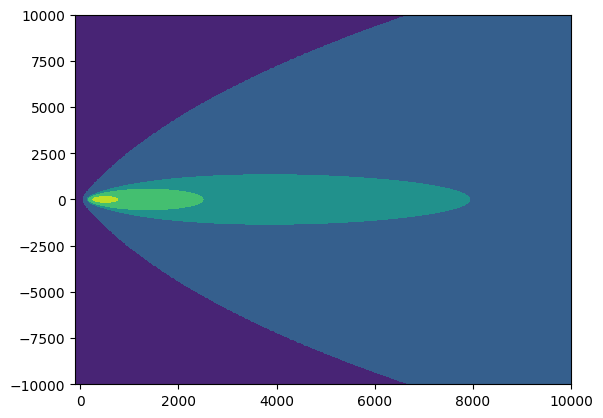

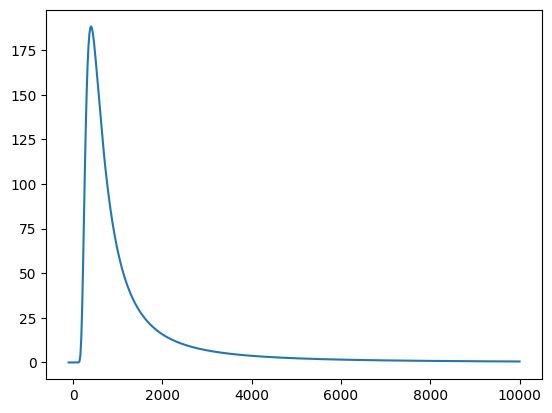

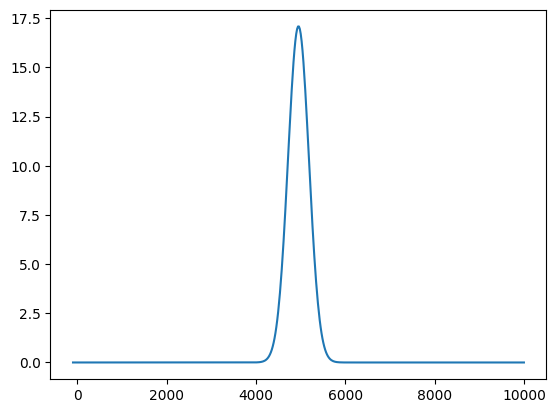

In [6]:
# Criando domínio de modelagem 
x = np.linspace(-100,10000,500)
#print(x)
y = np.linspace(-10000,10000,500)

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)
#print(xx.shape)


# Adotando inputs
classe = 'A'
urbOrRural = 'urbano' 
hg = 150 # m altura geométrica da chaminé
qs = 100 # g/s
u = 5 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
d = 1 # em metros
vs = 10 # em m/s
Ts = 300 # em Kelvin
Tamb = 293 # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY,sigmaZ = sigmaXY(xx,classe,urbOrRural)
#print(sigmaY)

if vs>1.5*u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHdavidsonBryant(d,vs,u,Ts,Tamb)
    print('deltaH = '+str(deltaH))
    hef = hg+deltaH
    print('A pluma subiu')
else:
    hef = hg +2*d*((vs/u)-1.5)
    print('A pluma caiu')

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY, sigmaZ,u,yy,z,hef)

# Visualização dos resultados no espaço
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig,ax = plt.subplots()
ax.contourf(xx,yy,conc+0.1,norm = LogNorm())

# Corte em y - sobre o eixo x
fig,ax = plt.subplots()
ax.plot(x,conc[250,:])

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(x,conc[:,100])

In [7]:
def holland_tipdownwash(d, vs, u, Ts, Tamb, hg):
   # Calcula a sobrelevação da pluma sem considerar o efeito Tip-Downwash
    deltaH = (d * (vs / u)**1.4) * (1 + (Ts - Tamb) / Ts)
    return deltaH


deltaH = 2.700592857381857
A pluma subiu


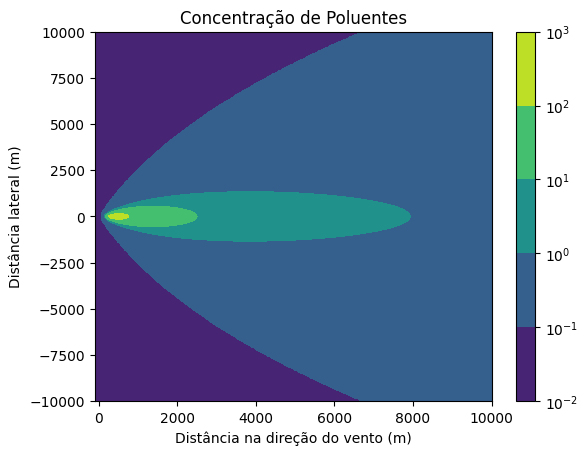

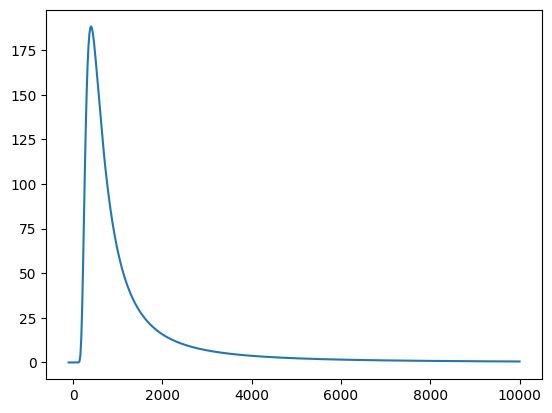

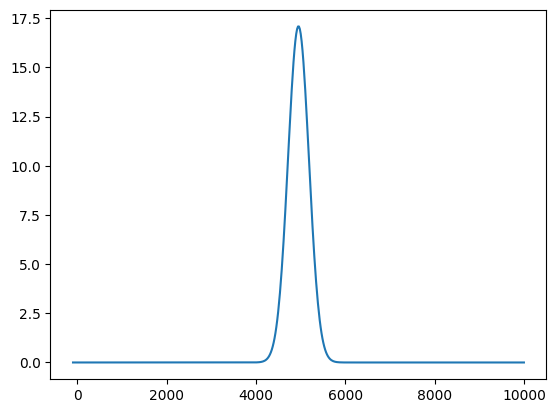

In [8]:



# Adotando inputs
classe = 'A'
urbOrRural = 'urbano' 
hg = 150 # m altura geométrica da chaminé
qs = 100 # g/s
sigmaY = 10 # m
sigmaZ = 15 # m
u = 5 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
d = 1 # em metros
vs = 10 # em m/s
Ts = 300 # em Kelvin
Tamb = 293 # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY,sigmaZ = sigmaXY(xx,classe,urbOrRural)
#print(sigmaY)

if vs>1.5*u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH =holland_tipdownwash(d, vs, u, Ts, Tamb, hg)
    print('deltaH = '+str(deltaH))
    h = hg+ deltaH
    print('A pluma subiu')
else:
    h = hg +2*d*((vs/u)-1.5)
    print('A pluma caiu')

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,yy,z,h)

# Visualização dos resultados no espaço
fig, ax = plt.subplots()
cf = ax.contourf(xx, yy, conc + 0.1, norm=LogNorm())
plt.colorbar(cf)
plt.title("Concentração de Poluentes")
plt.xlabel("Distância na direção do vento (m)")
plt.ylabel("Distância lateral (m)")
plt.show()


# Corte em y - sobre o eixo x
fig,ax = plt.subplots()
ax.plot(x,conc[250,:])

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(x,conc[:,100])



In [9]:
# Dados de velocidade do vento para simulação
velocidades_vento = [1.5, 2.5, 3.5, 4.5]  # m/s

# Dados de insolação solar para simulação durante o dia
insolacoes_solar = ['alta', 'moderada', 'baixa']

# Dados de cobertura de nuvens para simulação durante a noite
coberturas_nuvens = ['claro', 'parcialmente_nublado', 'nublado']

In [10]:
resultados = {}

# Simulação para cada combinação de variáveis
for periodo in ['dia', 'noite']:
    for velocidade_vento in velocidades_vento:
        if periodo == 'dia':
            for insolar_solar in insolacoes_solar:
                chave = (periodo, velocidade_vento, insolar_solar)
                classe_estabilidade = determinarClasseEstabilidade(velocidade_vento, insolar_solar=insolar_solar, periodo=periodo)
                resultados[chave] = classe_estabilidade
        elif periodo == 'noite':
            for cobertura_nuvens in coberturas_nuvens:
                chave = (periodo, velocidade_vento, cobertura_nuvens)
                classe_estabilidade = determinarClasseEstabilidade(velocidade_vento, cobertura_nuvens=cobertura_nuvens, periodo=periodo)
                resultados[chave] = classe_estabilidade

# Mostrar os resultados
for chave, classe_estabilidade in resultados.items():
    print(f'Período: {chave[0]}, Velocidade do Vento: {chave[1]}, Condição: {chave[2]}, Classe: {classe_estabilidade}')


Período: dia, Velocidade do Vento: 1.5, Condição: alta, Classe: A
Período: dia, Velocidade do Vento: 1.5, Condição: moderada, Classe: B
Período: dia, Velocidade do Vento: 1.5, Condição: baixa, Classe: C
Período: dia, Velocidade do Vento: 2.5, Condição: alta, Classe: B
Período: dia, Velocidade do Vento: 2.5, Condição: moderada, Classe: B
Período: dia, Velocidade do Vento: 2.5, Condição: baixa, Classe: C
Período: dia, Velocidade do Vento: 3.5, Condição: alta, Classe: C
Período: dia, Velocidade do Vento: 3.5, Condição: moderada, Classe: C
Período: dia, Velocidade do Vento: 3.5, Condição: baixa, Classe: D
Período: dia, Velocidade do Vento: 4.5, Condição: alta, Classe: C
Período: dia, Velocidade do Vento: 4.5, Condição: moderada, Classe: C
Período: dia, Velocidade do Vento: 4.5, Condição: baixa, Classe: D
Período: noite, Velocidade do Vento: 1.5, Condição: claro, Classe: F
Período: noite, Velocidade do Vento: 1.5, Condição: parcialmente_nublado, Classe: E
Período: noite, Velocidade do Vento

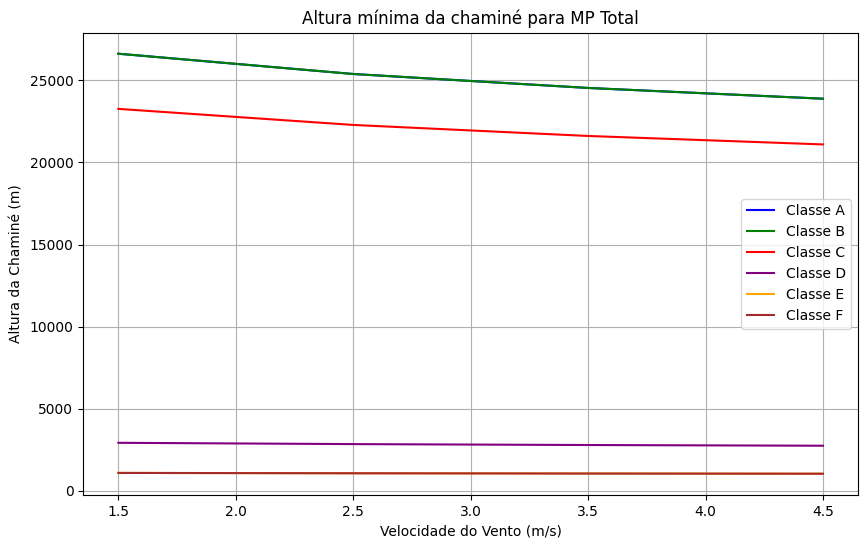

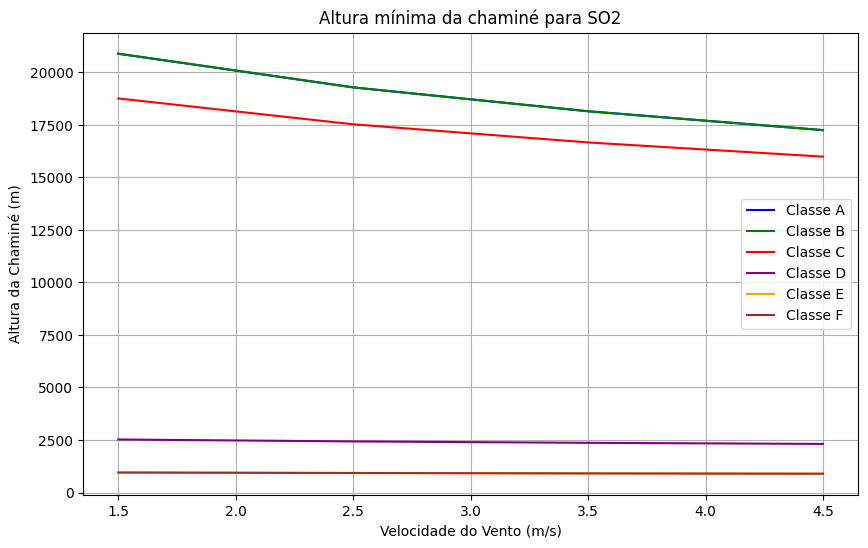

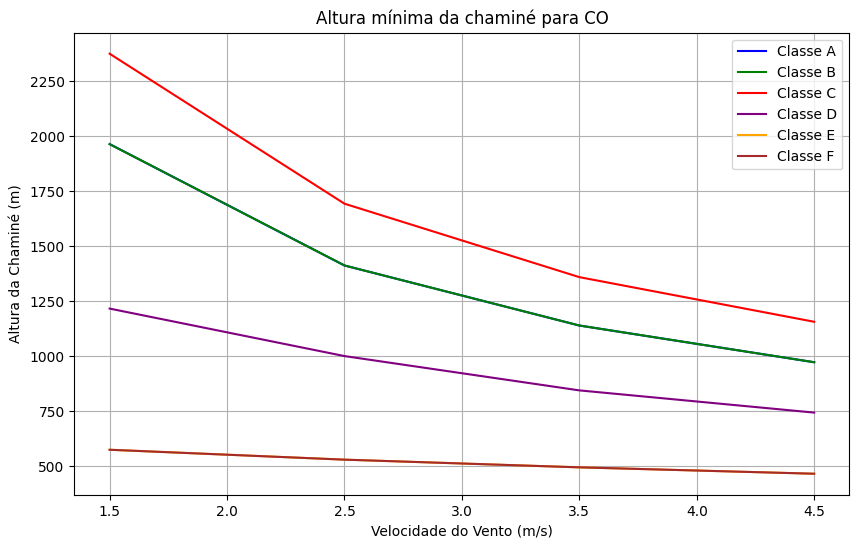

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def sigmaXY(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe in ['A', 'B']:
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.20 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.14 * x * (1 + 0.0003 * x) ** (-0.5)
        elif classe in ['E', 'F']:
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.001 * x) ** (-0.5)
        else:
            raise ValueError('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.03 * x * (1 + 0.0003 * x) ** (-1)
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.016 * x * (1 + 0.0003 * x) ** (-1)
        else:
            raise ValueError('Classe de estabilidade errada')
    else:
        raise ValueError('Tipo de área inválido')

    # Garantir que sigmaY e sigmaZ não sejam zero para evitar divisões por zero
    sigmaY = np.maximum(sigmaY, 0.001)
    sigmaZ = np.maximum(sigmaZ, 0.001)

    return sigmaY, sigmaZ

def deltaHdavidsonBryant(d, vs, u, Ts, Tamb):
    deltaH = (d * (vs / u)**(1.4)) * (1 + (Ts - Tamb) / Ts)
    return deltaH

def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H):
    termo1 = qs / (2 * np.pi * sigmaY * sigmaZ * u)
    termo2 = np.exp((-y**2) / (2 * sigmaY**2))
    termo3 = np.exp((-(z - H)**2) / (2 * sigmaZ**2)) + np.exp((-(z + H)**2) / (2 * sigmaZ**2))
    conc = termo1 * termo2 * termo3
    conc = conc * 10**6  # Convertendo para microgramas por metro cúbico
    return conc

# Função para determinar a altura mínima da chaminé
def altura_minima_chamine(qs, velocidade_vento, classe, urbOrRural, x, y, z, H_inicial, deltaH_func, sigmaXY_func, modeloGaussiano_func, padrao_CONAMA):
    H = H_inicial
    excede_padrao = True
    while excede_padrao:
        sigmaY, sigmaZ = sigmaXY_func(x, classe, urbOrRural)
        if vs > 1.5 * velocidade_vento:
            deltaH = deltaH_func(d, vs, velocidade_vento, Ts, Tamb)
            hef = H + deltaH
        else:
            hef = H + 2 * d * ((vs / velocidade_vento) - 1.5)
        
        conc = modeloGaussiano_func(qs, sigmaY, sigmaZ, velocidade_vento, y, z, hef)
        
        if np.max(conc) < padrao_CONAMA:
            excede_padrao = False
        else:
            H += 1
    
    return H

# Parâmetros e constantes
poluentes = {
    'MP Total': 2184.293,  # g/s
    'SO2': 67.487,         # g/s
    'CO': 99.776           # g/s
}

padroes_CONAMA = {
    'MP Total': 0.15,  # µg/m³
    'SO2': 0.04,       # µg/m³
    'CO': 9            # µg/m³
}

classes_estabilidade = ['A', 'B', 'C', 'D', 'E', 'F']
velocidades_vento = [1.5, 2.5, 3.5, 4.5]
urbOrRural = 'urbano'
x = np.linspace(0, 10000, 500)
y = 0  # Na direção do vento
z = 1.5  # Altura do nariz
d = 1  # Diâmetro da chaminé em metros
vs = 10  # Velocidade de saída dos gases em m/s
Ts = 300  # Temperatura dos gases em Kelvin
Tamb = 293  # Temperatura ambiente em Kelvin
H_inicial = 150  # Altura inicial da chaminé

# Realizando simulações
resultados = {}

for poluente, qs in poluentes.items():
    padrao_CONAMA = padroes_CONAMA[poluente]
    for classe in classes_estabilidade:
        for u in velocidades_vento:
            chave = (poluente, classe, u)
            H_min = altura_minima_chamine(qs, u, classe, urbOrRural, x, y, z, H_inicial, deltaHdavidsonBryant, sigmaXY, modeloGaussiano, padrao_CONAMA)
            resultados[chave] = H_min

# Configurações para visualização
cores = {
    'A': 'blue',
    'B': 'green',
    'C': 'red',
    'D': 'purple',
    'E': 'orange',
    'F': 'brown'
}

# Visualizar resultados para cada poluente
for poluente in poluentes.keys():
    plt.figure(figsize=(10, 6))
    
    for classe in classes_estabilidade:
        alturas = [resultados[(poluente, classe, u)] for u in velocidades_vento]
        plt.plot(velocidades_vento, alturas, label=f'Classe {classe}', color=cores[classe])
    
    plt.title(f'Altura mínima da chaminé para {poluente}')
    plt.xlabel('Velocidade do Vento (m/s)')
    plt.ylabel('Altura da Chaminé (m)')
    plt.legend()
    plt.grid(True)
    plt.show()
